### NAME: Neha Adawadkar

### TASK 3: Exploratory Data Analysis - Retail

Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’.As a business manager, try to find out the weak areas where you can work to make more profit.

Import all the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Read the data from the dataset

In [2]:
data=pd.read_csv("SampleSuperstore.csv")
data.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


Describing the dataset

In [3]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


Checking if there are any null values present in the dataset

In [4]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

Checking the number of rows and columns

In [5]:
data.shape

(9994, 13)

Checking if the dataset has any duplicate values

In [6]:
data.duplicated().sum()

17

In [7]:
data.drop_duplicates(inplace=True)

In [8]:
data.shape

(9977, 13)

Getting the count for each country

In [9]:
data['Country'].value_counts()

United States    9977
Name: Country, dtype: int64

Dropping unwanted columns

In [10]:
col=['Postal Code','Country']
data=data.drop(columns=col,axis=1)

Count the total repeatable values of state

In [11]:
data['State'].value_counts()

California              1996
New York                1127
Texas                    983
Pennsylvania             586
Washington               502
Illinois                 491
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   123
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Utah                      53
Mississippi               53
Louisiana                 42
South Carolina            42
Nevada        

PLOTTING THE BAR GRAPH OF STATES WITH RESPECT TO COUNT.

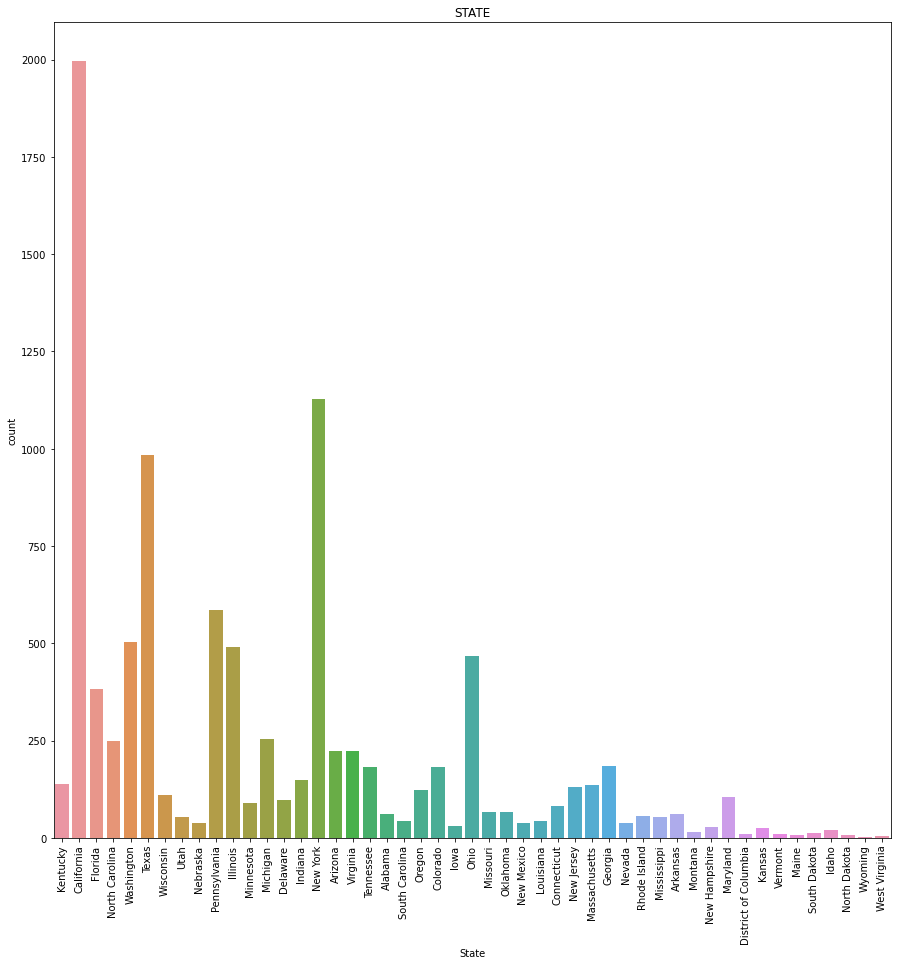

In [12]:
plt.figure(figsize=(15,15))
sns.countplot(x=data['State'])
plt.xticks(rotation=90)
plt.title("STATE")
plt.show()

CHECKING THE PROFIT BASED ON REGION.

Text(0.5, 1.0, 'Total profit based on region')

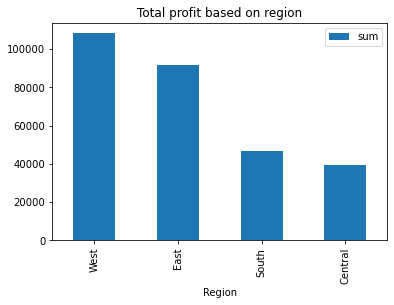

In [13]:
data.groupby('Region')['Profit'].agg(['sum']).sort_values(['sum'], ascending=False).plot.bar()
plt.title("Total profit based on region")

From the above bar plot we can say that the region with highest profit is Western region and the region with lowest profit is Central region of the country

CALCULATING THE PROFIT IN EACH STATE.

Text(0.5, 1.0, 'Profit in each sate')

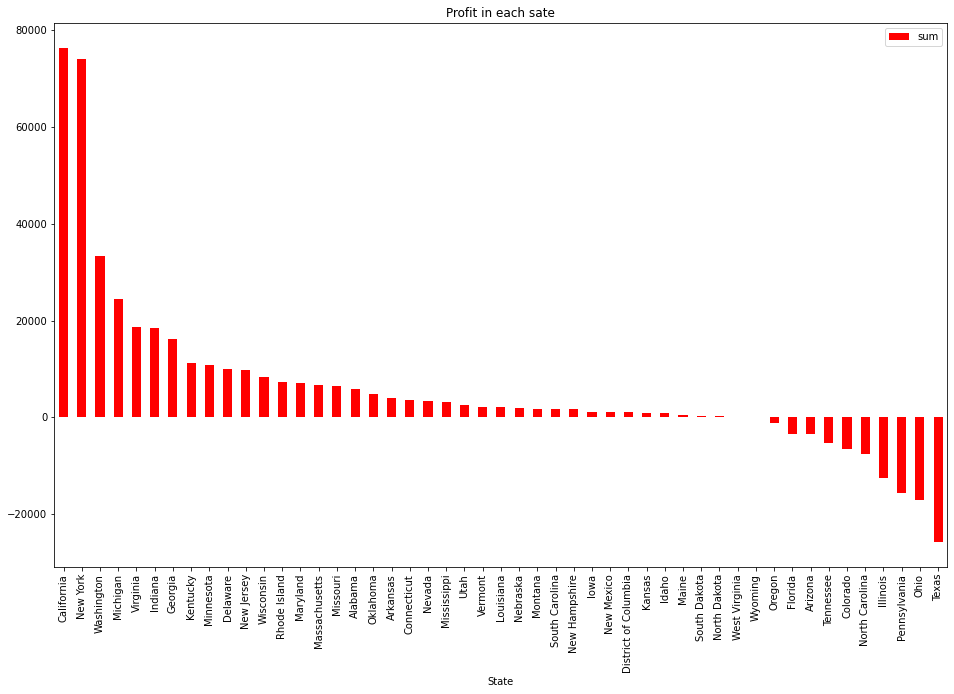

In [14]:
data.groupby('State')['Profit'].agg(['sum']).sort_values(['sum'], ascending=False).plot.bar(figsize=(16,10), color="red");
plt.title("Profit in each sate")

From above graph, we can see that the maximum profit earned in the country is in California which is followed by New York and the minimum profit earned is in Texas followed by Ohio

LINE PLOT GRAPH OF DISCOUNT W.R.T PROFIT

C:\Users\naapu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


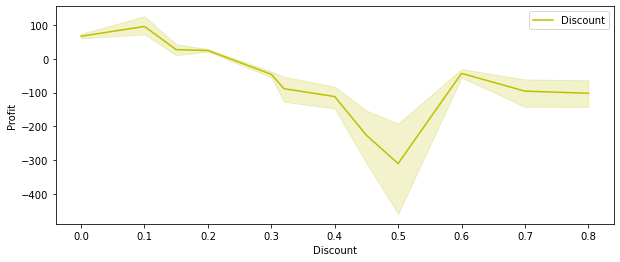

In [15]:
plt.figure(figsize=(10,4))
sns.lineplot('Discount','Profit', data=data , color='y',label='Discount')
plt.legend()
plt.show()

Getting the count of each products in sub-categories.

In [16]:
data['Sub-Category'].value_counts()

Binders        1522
Paper          1359
Furnishings     956
Phones          889
Storage         846
Art             795
Accessories     775
Chairs          615
Appliances      466
Labels          363
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

PIE- CHART FOR PRODUCTS IN EACH SUB-CATEGORY.

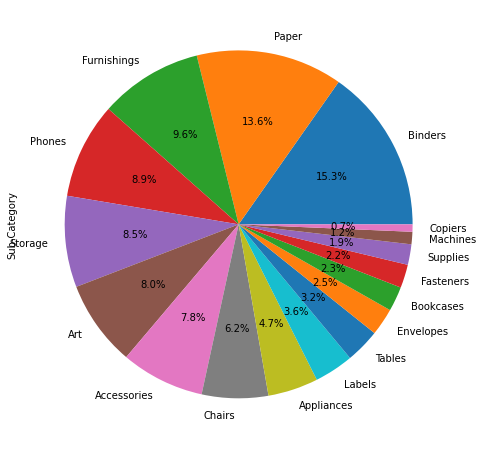

In [17]:
plt.figure(figsize=(10,8))
data['Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

TOTAL PROFIT AND SALES PER SUB-CATEGORY.

<ipython-input-18-de857439d9a6>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar(figsize=(16,10))


<Figure size 576x432 with 0 Axes>

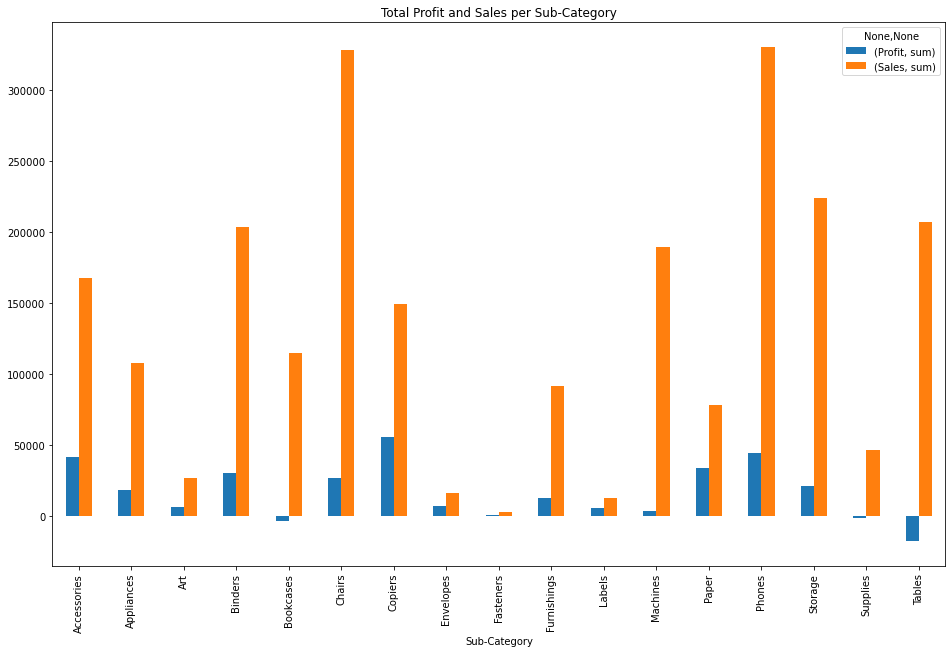

In [18]:
plt.figure(figsize=(8,6))
data.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar(figsize=(16,10))
plt.title('Total Profit and Sales per Sub-Category')
plt.show();

By observing the graph we can say that the sales is more in the phones and chairs whereas the profit is more in copies as well as phones.

COUNT OF SUB-CATEGORY REGION WISE.

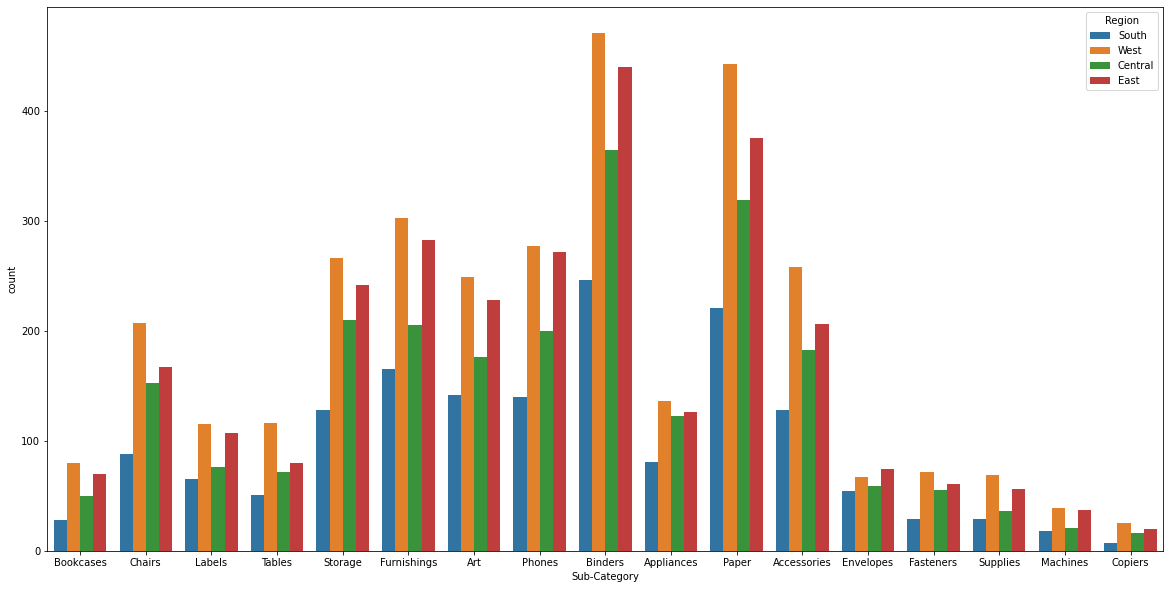

In [19]:
plt.figure(figsize=(20,10))
sns.countplot(x="Sub-Category", hue="Region", data=data)
plt.show()

People residing in Western part of US tend to order more Binders and paper fom the superstore.

PROFIT BASED ON SEGMENTS

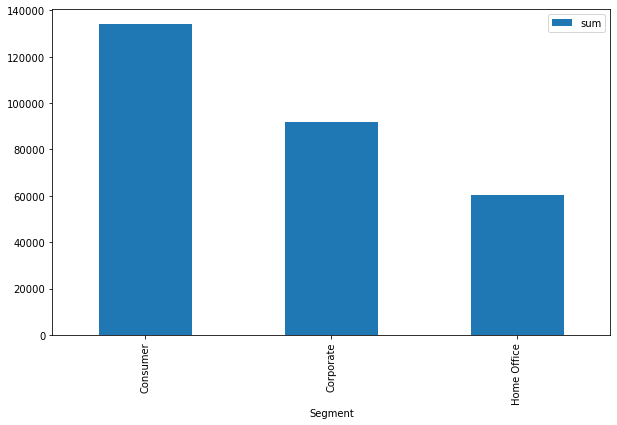

In [21]:
data.groupby('Segment')['Profit'].agg(['sum']).sort_values(['sum'],ascending=False).plot.bar(figsize=(10,6));

The most profitable Segment is Consumers followed by Corporate and Home Office.

#### CONCLUSION: 

1. The most profitable region is western region and the weak region is central region .
2. Maximum number of profit are in the state of California and New york whereas the maximum loss is in the state of Texas and Ohio.
3. In segment customers have maximium profits.
4. In sub-category the more sales are in chairs and phones and maximum profits are in copiers and phones. 